# Boolean-Matrix Factorization
### Adam Fletcher

## Using Nimfa Library

In [36]:
import numpy as np
import scipy.sparse as sp

import nimfa

V = np.random.rand(40, 100)
bmf = nimfa.Bmf(V, seed="nndsvd", rank=10, max_iter=12, lambda_w=1.1, lambda_h=1.1)
bmf_fit = bmf()

In [37]:
V

array([[0.70901368, 0.20047079, 0.22380541, ..., 0.01034329, 0.78597119,
        0.83813444],
       [0.66247919, 0.20825149, 0.66284579, ..., 0.09262092, 0.79145165,
        0.91429812],
       [0.07781617, 0.45929183, 0.09450264, ..., 0.47667165, 0.05638836,
        0.77825638],
       ...,
       [0.74983991, 0.67127655, 0.26909326, ..., 0.84388171, 0.93970526,
        0.95365366],
       [0.51498369, 0.93693365, 0.87873129, ..., 0.85535936, 0.97306388,
        0.52754634],
       [0.87362418, 0.41994157, 0.11458716, ..., 0.04049312, 0.3942726 ,
        0.82957279]])

In [38]:
def __fact_factor(X):
    """
    Return dense factorization factor, so that output is printed nice if factor is sparse.
     
    :param X: Factorization factor.
    :type X: :class:`scipy.sparse` of format csr, csc, coo, bsr, dok, lil, dia or :class:`numpy.matrix`
    """
    return X.todense() if sp.isspmatrix(X) else X


def print_info(fit, idx=None):
    """
    Print to stdout info about the factorization.
     
    :param fit: Fitted factorization model.
    :type fit: :class:`nimfa.models.mf_fit.Mf_fit`
    :param idx: Name of the matrix (coefficient) matrix. Used only in the multiple NMF model. Therefore in factorizations 
                that follow standard or nonsmooth model, this parameter can be omitted. Currently, SNMNMF implements 
                multiple NMF model.
    :type idx: `str` with values 'coef' or 'coef1' (`int` value of 0 or 1, respectively) 
    """
    print("=================================================================================================")
    print("Factorization method:", fit.fit)
    print("Initialization method:", fit.fit.seed)
    print("Basis matrix W: ")
    print(__fact_factor(fit.basis()))
    print("Mixture (Coefficient) matrix H%d: " % (idx if idx != None else 0))
    print(__fact_factor(fit.coef(idx)))
    print("Distance (Euclidean): ", fit.distance(metric='euclidean', idx=idx))
    # We can access actual number of iteration directly through fitted model.
    # fit.fit.n_iter
    print("Actual number of iterations: ", fit.summary(idx)['n_iter'])
    # We can access sparseness measure directly through fitted model.
    # fit.fit.sparseness()
    print("Sparseness basis: %7.4f, Sparseness mixture: %7.4f" % (fit.summary(idx)['sparseness'][0], fit.summary(idx)['sparseness'][1]))
    # We can access explained variance directly through fitted model.
    # fit.fit.evar()
    print("Explained variance: ", fit.summary(idx)['evar'])
    # We can access residual sum of squares directly through fitted model.
    # fit.fit.rss()
    print("Residual sum of squares: ", fit.summary(idx)['rss'])
    # There are many more ... but just cannot print out everything =] and some measures need additional data or more runs
    # e.g. entropy, predict, purity, coph_cor, consensus, select_features, score_features, connectivity
    print("=================================================================================================")

## Test Data

In [321]:
print_info(bmf_fit);

Factorization method: bmf
Initialization method: nndsvd
Basis matrix W: 
[[1.02313116 1.25500549 1.19956557 1.34616132 1.20482833 1.20583993
  1.41054431 1.08432558 1.16190144 1.17887978]
 [1.04345411 1.28942861 1.25684149 1.18702797 0.95269566 1.34557889
  1.17683164 0.87549551 1.15701234 1.13117169]
 [0.8515613  0.98607321 0.75989555 1.21386823 0.99279048 1.16386916
  1.14953104 1.1415956  0.39610432 0.99923507]
 [0.93116977 1.12710774 1.22362452 1.18728205 0.99473005 1.24130889
  1.22854145 1.22133532 1.31289116 1.0076808 ]
 [0.67720801 1.24655704 1.23638432 1.02344978 1.20807578 0.96441957
  1.04935064 1.12503908 0.99150676 1.25116192]
 [1.13743766 1.06115862 1.30954126 1.16400085 0.89559477 0.99713479
  1.10118116 1.34178378 0.91292539 1.11339824]
 [1.102424   0.9686384  1.15143395 1.20269008 1.27790794 1.01237584
  1.20902105 1.21630645 1.10989493 0.9944517 ]
 [1.21521159 1.22213362 1.03970217 1.16909046 1.14185502 0.91818457
  1.23559871 1.03560719 0.98805295 1.19513722]
 [1.200

## OLX Data

In [27]:
import pandas as pd
seekers_data = pd.read_csv("./job_persona_data/seekers.csv")

In [322]:
seekers_data.head()

,user_id,ad_id,clm_session_id,category_id,platform,survive,escape,quick_process,getting_inspired,structured_process,...,missed_interview,satisfaction,shortcutter,survivor,dreamer,prepared,perfect,believer,no_persona,top_persona
0,NaN,559049799,6ad1a391-c185-459b-93a9-405937800712,1429.0,Desktop,False,True,False,True,True,...,True,4,False,False,True,True,False,True,False,survivor
1,21266565.0,554112099,9c8fc8fb-120a-4343-8823-f1887ec67449,64.0,Desktop,False,True,False,False,True,...,False,6,False,True,True,True,False,False,False,perfect
2,466434494.0,560333784,0cfef4a5-d381-4bb6-86be-7585ce8268b4,1435.0,Desktop,True,True,True,True,False,...,False,8,False,False,False,False,False,False,True,believer
3,327449132.0,558376188,09c1f2dd-9170-435e-bad1-9aa8a6de91af,163.0,Desktop,False,True,False,False,True,...,False,6,True,False,True,True,False,True,False,survivor
4,50779897.0,258372561,5c66f5ce-64dc-4f44-9721-1dc9108991ee,164.0,Desktop,False,True,True,True,False,...,False,5,True,True,True,False,False,True,False,prepared


**Data Cleanup To Do:**
- Turn True/False into 1's and 0's (Already a Bool)
- What are the different platforms (Only Desktop) -- CAN REMOVE
- top_persona is my label! (Though this is an unsupervised process)

In [22]:
seekers_data.dtypes

user_id                  float64
ad_id                      int64
clm_session_id            object
category_id              float64
platform                  object
survive                     bool
escape                      bool
quick_process               bool
getting_inspired            bool
structured_process          bool
boost_my_cv                 bool
quick_scan                  bool
prove_to_self               bool
compare_options             bool
rich_data                   bool
unbiased_information        bool
dry_data                    bool
clear_job_information       bool
human_verification          bool
head_start                  bool
treated_with_respect        bool
standing_out                bool
present_real_me             bool
manage_insecurity           bool
being_informed              bool
learn_from_process          bool
rank_values                int64
rank_money                 int64
rank_stability             int64
rank_atmosphere            int64
rank_balan

In [21]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print(x)
        
unique(seekers_data['platform'])

Desktop


In [367]:
# Removing Unneeded Columns

cleaned_seekers_data = seekers_data[[
    #'user_id',
    'survive',
    'escape',
    'quick_process',
    'getting_inspired',
    'structured_process',
    'boost_my_cv',
    'quick_scan',
    'prove_to_self',
    'compare_options',
    'rich_data',
    'unbiased_information',
    'dry_data',
    'clear_job_information',
    'human_verification',
    'head_start',
    'treated_with_respect',
    'standing_out',
    'present_real_me',
    'manage_insecurity',
    'being_informed',
    'learn_from_process',
    'values',
    'money',
    'stability',
    'atmosphere',
    'balance',
    'happiness',
    'development',
    'promotion',
    'freedom',
    'missed_interview'
]]

In [368]:
seekers_array = cleaned_seekers_data.to_numpy()
seekers_array

array([[False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False]])

## Define Nimfa Model

In [369]:
# Define the Model

seekers_bmf = nimfa.Bmf(
    seekers_array, 
    seed="nndsvd", 
    rank=8, 
    max_iter=50000, 
    lambda_w=1.1, 
    lambda_h=1.1)

In [370]:
seekers_bmf_fit = seekers_bmf()

In [371]:
#print_info(seekers_bmf_fit)

In [580]:
seekers_W = __fact_factor(seekers_bmf_fit.basis())
seekers_W = pd.DataFrame(seekers_W)

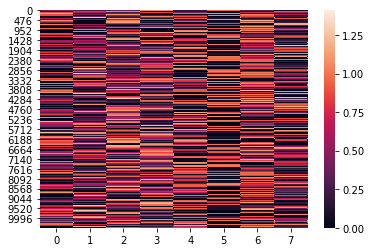

In [373]:
import seaborn as sns
sns.heatmap(seekers_W)

In [578]:
seekers_H = __fact_factor(seekers_bmf_fit.coef(idx= None))
seekers_H = pd.DataFrame(seekers_H)
seekers_H

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,5.680299e-01,0.012052,6.757678e-01,9.464001e-03,0.000388,3.425162e-08,2.459166e-01,2.902905e-02,0.068773,0.001670,...,3.685390e-02,2.030930e-03,1.216811e-07,9.629400e-05,1.499118e-02,2.254654e-04,8.293995e-10,2.923991e-02,1.011416e-01,2.628003e-01
1,2.050220e-06,0.019895,1.673009e-08,3.030094e-10,0.466503,2.621503e-01,4.014487e-09,1.433567e-02,0.394883,0.412127,...,4.579444e-01,4.436531e-15,6.524473e-11,2.220446e-16,6.668216e-06,2.630897e-01,3.561044e-05,4.236249e-01,4.520356e-01,1.884231e-02
2,4.448208e-10,0.106498,9.799996e-03,4.020869e-04,0.456113,1.089329e-03,3.920401e-11,4.484328e-03,0.436351,0.442375,...,2.220446e-16,7.053031e-01,1.451931e-05,5.885721e-01,4.717877e-01,2.975752e-11,3.085892e-14,2.220446e-16,2.220446e-16,2.527897e-11
3,2.594912e-01,0.002595,4.944367e-14,1.605772e-08,0.435551,3.212649e-03,3.203227e-04,3.492621e-07,0.266722,0.324151,...,4.025665e-10,7.585198e-02,5.145776e-01,1.490041e-03,1.660043e-01,4.125704e-14,1.097967e-07,4.638113e-15,2.220446e-16,9.054709e-12
4,3.925526e-08,0.068974,5.124583e-06,1.039868e+00,0.026363,2.251630e-11,1.628698e-01,1.556440e-05,0.229093,0.191878,...,1.313122e-03,2.932116e-06,3.815166e-14,7.264591e-02,6.446261e-02,3.088155e-01,6.490666e-11,7.424917e-08,1.952995e-02,4.393909e-09
5,1.116004e-02,0.000156,7.909270e-11,6.317669e-03,0.222169,6.783191e-08,5.023849e-03,2.373772e-01,0.203954,0.183205,...,5.340917e-13,1.788484e-02,1.366310e-12,1.238526e-03,5.072146e-14,2.470520e-10,1.015020e+00,2.992407e-10,2.220446e-16,9.563461e-08
6,1.855094e-07,0.656267,1.241876e-03,1.885683e-03,0.018037,2.148500e-04,3.074638e-01,5.600431e-01,0.230605,0.220760,...,2.414978e-02,6.732556e-02,2.558075e-01,6.353840e-12,1.289044e-04,4.921011e-14,1.195705e-05,4.802496e-02,1.251318e-06,1.630273e-02
7,6.554706e-07,0.514563,3.522574e-12,6.922911e-09,0.079512,7.794745e-01,2.555602e-02,2.848814e-01,0.125948,0.079171,...,6.611010e-12,8.102242e-02,2.899866e-15,3.054862e-01,1.201712e-04,4.594150e-02,2.804535e-12,4.282378e-12,1.996646e-09,3.429905e-01


In [375]:
pd.DataFrame(seekers_array).to_csv('seekers_array.csv')

## Predict Original Array

In [376]:
predictions = pd.DataFrame(np.dot(seekers_W, seekers_H))
predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.168680,1.190997,0.194104,0.802480,0.690235,1.053731,0.502598,0.834691,1.019416,0.936443,...,0.543167,0.190860,0.247194,0.392913,0.088785,0.574522,0.074875,0.523735,0.546686,0.445905
1,0.283336,0.920280,0.167146,0.005648,0.861289,0.303912,0.348950,0.681906,0.964418,0.958270,...,0.037465,0.927563,0.533112,0.774067,0.626365,0.021499,0.208296,0.057066,0.030014,0.206072
2,0.451792,0.840630,0.461792,0.865380,0.616137,0.123762,0.634063,0.651924,0.971146,0.909355,...,0.265422,0.448774,0.412845,0.355146,0.343215,0.376998,0.066195,0.269141,0.294795,0.203645
3,0.362552,0.961589,0.236480,0.412571,0.886653,0.922593,0.401156,0.675667,0.999634,0.972376,...,0.544399,0.164501,0.518349,0.275115,0.135982,0.452811,0.000049,0.520714,0.549206,0.400744
4,0.177442,0.704137,0.222431,0.813906,0.692430,0.100426,0.450382,0.468865,0.994264,0.949315,...,0.205047,0.798411,0.205393,0.677180,0.552427,0.339787,0.000023,0.207841,0.217680,0.102306


In [378]:
# 10453 rows 37 columns
rounded_predictions = predictions

for column in rounded_predictions:
    
    for row in range(len(rounded_predictions)):
        if rounded_predictions.iloc[row][column] >= 0.5:
            rounded_predictions.iloc[row][column] = 1
        else:
            rounded_predictions.iloc[row][column] = 0


In [379]:
rounded_predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Calculate Error Rate

In [380]:
difference = rounded_predictions - ((pd.DataFrame(seekers_array)) * 1)
difference = difference.abs()
#sns.heatmap(difference)
#difference.head()
diff_vector = difference.sum()
print("Error Rate:", (diff_vector.sum() / (10453 * 37)) * 100, "%"   )

Error Rate: 14.99918554352688 %


## Sci-kit Learn NMF

### Test Data

In [512]:
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=6, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [513]:
pd.DataFrame(X).head()

,0,1
0,1.0,1.0
1,2.0,1.0
2,3.0,1.2
3,4.0,1.0
4,5.0,0.8


In [514]:
pd.DataFrame(W).head()

,0,1,2,3,4,5
0,0.451413,0.194898,0.202769,0.141291,1.298109,0.133229
1,0.047003,0.001020,1.293277,0.656043,0.001080,0.129068
2,1.734598,0.079991,0.466872,0.499153,0.031942,0.433018
3,2.141710,0.104777,0.628901,1.317190,0.134831,0.000004
4,3.371036,0.032097,0.446632,0.969597,0.035347,0.000009


In [515]:
pd.DataFrame(H).head()

,0,1
0,1.164558,0.100448
1,0.254169,2.100913
2,1.197877,0.582993
3,0.545892,0.130620
4,0.050759,0.192855


In [516]:
pd.DataFrame(np.dot(W, H))

,0,1
0,0.999996,1.000017
1,2.000003,0.999990
2,3.000000,1.199998
3,4.000010,0.999962
4,5.000027,0.799907
5,5.999961,1.000144


### OLX Data

In [517]:
# Model Definition
model = NMF(n_components=6, init='nndsvda', random_state=0)


scikit_seekers_W = model.fit_transform(seekers_array)
scikit_seekers_H = model.components_

In [518]:
pd.DataFrame(scikit_seekers_W).head()

,0,1,2,3,4,5
0,0.004221,0.095947,0.064113,0.013823,0.066210,0.028921
1,0.037472,0.025390,0.021372,0.126020,0.061206,0.023366
2,0.002845,0.042287,0.095473,0.108963,0.024091,0.022357
3,0.000000,0.073642,0.066699,0.007176,0.153281,0.015794
4,0.008152,0.029149,0.038813,0.102982,0.000000,0.267281


In [577]:
pd.DataFrame(scikit_seekers_H)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,3.823723,0.000000,4.502054,6.273615,0.000000,0.000000,2.943507,7.322705,7.240221,...,0.000000,0.000000,0.000000,27.8807,0.000000,0.707798,0.000000,0.000000,0.000000,0.000000
1,0.000000,6.151215,0.585489,0.000000,7.178791,6.030259,0.000000,6.246851,7.723648,7.456155,...,5.273764,0.000000,0.000000,0.0000,0.000000,4.162819,5.019614,5.615520,5.306768,2.749910
2,3.980050,3.462978,3.942179,6.564864,0.000000,0.000000,6.338620,3.346289,2.501492,1.487632,...,0.712036,0.000000,0.617590,0.0000,0.000000,2.205333,0.049801,0.450555,0.994646,3.193574
3,0.000000,2.849449,0.601035,0.185997,2.630759,0.388549,0.000000,1.592826,3.040877,2.960608,...,0.000000,10.015919,1.484869,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.425045,0.252951,0.000000,0.000000,2.301129,1.744043,0.118425,0.000000,1.518545,1.871927,...,0.000000,0.000000,2.695106,0.0000,0.000000,0.000000,1.572069,0.000000,0.000000,0.000000
5,0.000000,0.676410,0.093827,0.226646,0.947483,0.526556,0.000000,0.152176,1.047330,1.003681,...,0.000000,0.000000,0.081242,0.0000,4.091561,0.000000,0.000000,0.000000,0.000000,0.000000


### Predicted Matrix and Error Rate

In [520]:
scikit_predictions = pd.DataFrame(np.dot(scikit_seekers_W, scikit_seekers_H))
scikit_predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.349523,0.904050,0.319941,0.449022,0.931391,0.714657,0.414226,0.852750,1.105216,1.035227,...,0.551652,0.138449,0.240912,0.117698,0.118334,0.543787,0.588895,0.567678,0.572937,0.468594
1,0.172283,0.763847,0.177053,0.337740,0.911863,0.321122,0.142717,0.544706,1.024588,1.003531,...,0.149118,1.262208,0.367177,1.044743,0.095604,0.179348,0.224731,0.152207,0.155996,0.138073
2,0.414318,0.933311,0.468718,0.664907,0.684686,0.351124,0.608020,0.768971,0.977602,0.868051,...,0.290989,1.091360,0.287502,0.079310,0.091477,0.388594,0.254889,0.280477,0.319367,0.421184
3,0.483898,0.753871,0.311851,0.442785,0.915226,0.722516,0.440932,0.697061,1.006763,0.972342,...,0.435864,0.071878,0.466241,0.000000,0.064623,0.453653,0.613946,0.443591,0.457144,0.415518
4,0.154478,0.819112,0.257048,0.371236,0.784559,0.356526,0.246022,0.540669,0.975006,0.907252,...,0.181360,1.031456,0.198599,0.227283,1.093597,0.212707,0.148248,0.181173,0.193291,0.204109


In [521]:
for column in scikit_predictions:
    
    for row in range(len(scikit_predictions)):
        if scikit_predictions.iloc[row][column] >= 0.5:
            scikit_predictions.iloc[row][column] = 1
        else:
            scikit_predictions.iloc[row][column] = 0


In [522]:
scikit_predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [523]:
difference = scikit_predictions - ((pd.DataFrame(seekers_array)) * 1)
difference = difference.abs()
#sns.heatmap(difference)
#difference.head()
diff_vector = difference.sum()
print("Error Rate:", (diff_vector.sum() / (10453 * 37)) * 100, "%"   )

Error Rate: 16.59138330907201 %


# Explaining the Models to Koos/OLX

In terms of the interpretation, that'd be stuff like:
- does it succeed in differentiating people?
- how do the loadings from needs onto the latent classes compare with their persona model?
- what's the frequency of each latent class?
- can the latent classes do any better than personas when it comes to explaining variations in their platform/ tracking data?

In [581]:
# Does it succeed in differentiating people?

# The error rate of the best performing model was 14.99%

seekers_factors_personas =  seekers_data[[
    'shortcutter',
    'survivor',
    'dreamer',
    'prepared',
    'perfect',
    'believer',
    'no_persona',
    'top_persona']]

seekers_factors_personas['Factor 1'] = seekers_W[0]
seekers_factors_personas['Factor 2'] = seekers_W[1]
seekers_factors_personas['Factor 3'] = seekers_W[2]
seekers_factors_personas['Factor 4'] = seekers_W[3]
seekers_factors_personas['Factor 5'] = seekers_W[4]
seekers_factors_personas['Factor 6'] = seekers_W[5]
seekers_factors_personas['Factor 7'] = seekers_W[6]
seekers_factors_personas['Factor 7'] = seekers_W[7]


/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [612]:
seekers_factors_personas_pca_data = seekers_factors_personas[['Factor 1',
                                                             'Factor 2',
                                                             'Factor 3',
                                                             'Factor 4',
                                                             'Factor 5',
                                                             'Factor 6',
                                                             'Factor 7']]

In [664]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)

seekers_factors_personas_pca = pca.fit_transform(seekers_factors_personas_pca_data)

seekers_factors_personas_pca = pd.DataFrame(seekers_factors_personas_pca)

seekers_factors_personas_pca['persona'] = seekers_factors_personas['top_persona']

seekers_factors_personas_pca.head()


,0,1,2,persona
0,0.641398,0.510552,-0.508274,survivor
1,-0.576082,-0.542571,0.005733,perfect
2,-0.200686,0.597469,-0.235791,believer
3,0.701092,-0.026687,-0.650659,survivor
4,-0.606856,0.528259,-0.230160,prepared


In [667]:
## This process takes an age!! >45mins

seekers_factors_personas_pca['persona_index'] = ''
for i in range(len(seekers_factors_personas_pca)):
    
    if seekers_factors_personas_pca['persona'][i] == 'survivor':
        seekers_factors_personas_pca['persona_index'][i] = 1
        
    elif seekers_factors_personas_pca['persona'][i] == 'perfect':
        seekers_factors_personas_pca['persona_index'][i] = 2
        
    elif seekers_factors_personas_pca['persona'][i] == 'believer':
        seekers_factors_personas_pca['persona_index'][i] = 3
        
    elif seekers_factors_personas_pca['persona'][i] == 'prepared':
        seekers_factors_personas_pca['persona_index'][i] = 4
        
    elif seekers_factors_personas_pca['persona'][i] == 'shortcutter':
        seekers_factors_personas_pca['persona_index'][i] = 5
        
    elif seekers_factors_personas_pca['persona'][i] == 'dreamer':
        seekers_factors_personas_pca['persona_index'][i] = 6  
        
    else:
        seekers_factors_personas_pca['persona_index'][i] = 0

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


hit!


/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


hit!
hit!
hit!
hit!
hit!
hit!


/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!


hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!
hit!


In [668]:
seekers_factors_personas_pca.head()

,0,1,2,persona,persona_index
0,0.641398,0.510552,-0.508274,survivor,1
1,-0.576082,-0.542571,0.005733,perfect,2
2,-0.200686,0.597469,-0.235791,believer,3
3,0.701092,-0.026687,-0.650659,survivor,1
4,-0.606856,0.528259,-0.230160,prepared,4


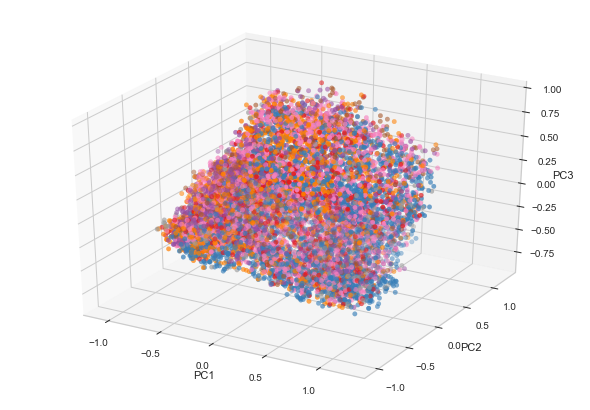

In [670]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = seekers_factors_personas_pca[0]
sequence_containing_y_vals = seekers_factors_personas_pca[1]
sequence_containing_z_vals = seekers_factors_personas_pca[2]


ax.scatter(sequence_containing_x_vals, 
           sequence_containing_y_vals, 
           sequence_containing_z_vals,
           c=seekers_factors_personas_pca['persona_index'],
           cmap = 'Set1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
pyplot.show()

# Alternative Approach
# k-means clustering

In [420]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=8, 
    random_state=0).fit(seekers_array)

In [421]:
kmeans.labels_

array([4, 5, 7, ..., 7, 5, 2], dtype=int32)

In [422]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)

principal_components = pca.fit_transform(seekers_array)

principalDf = pd.DataFrame(data = principal_components
             , columns = [
                 'principal component 1', 
                 'principal component 2',
                 'principal component 3'])

principalDf['cluster'] = kmeans.labels_


principalDf.head()

,principal component 1,principal component 2,principal component 3,cluster
0,-0.216623,-0.750796,0.369467,4
1,0.312733,0.148974,-0.980947,5
2,0.390239,0.547567,0.214818,7
3,-1.025547,-0.540051,0.931473,3
4,1.222923,0.320973,-0.241795,5


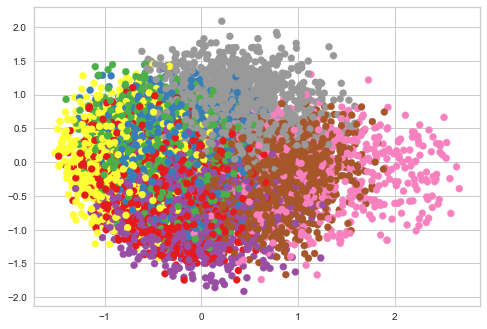

In [678]:

import matplotlib

matplotlib.pyplot.scatter(
    principalDf['principal component 1'], 
    principalDf['principal component 2'], 
    s=None, 
    c=principalDf['cluster'],
    #c=seekers_factors_personas_pca['persona_index'],
    cmap = 'Set1')

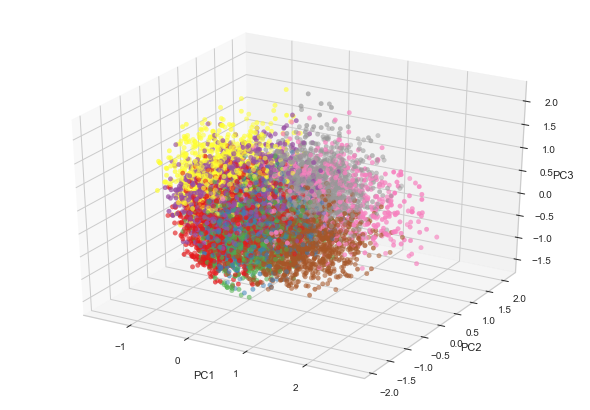

In [677]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = principalDf['principal component 1']
sequence_containing_y_vals = principalDf['principal component 2']
sequence_containing_z_vals = principalDf['principal component 3']


ax.scatter(sequence_containing_x_vals, 
           sequence_containing_y_vals, 
           sequence_containing_z_vals,
           c=principalDf['cluster'],
           #c=seekers_factors_personas_pca['persona_index'],
           cmap = 'Set1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
pyplot.show()

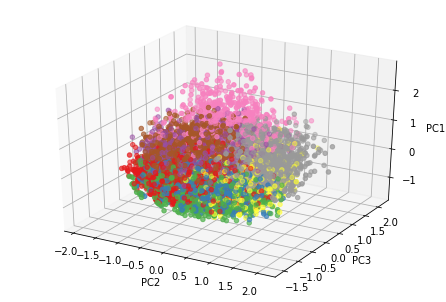

In [425]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = principalDf['principal component 2']
sequence_containing_y_vals = principalDf['principal component 3']
sequence_containing_z_vals = principalDf['principal component 1']


ax.scatter(sequence_containing_x_vals, 
           sequence_containing_y_vals, 
           sequence_containing_z_vals,
           c=principalDf['cluster'],
           cmap = 'Set1')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC1')
pyplot.show()

## Comparing Clustering to Persona Identification

Koos and Robin did research and analysis to identify personas using the site.
In what capacity do the clusters and personas match up

In [426]:
#comparison_df = pd.DataFrame([
#    seekers_data['user_id'], 
#    seekers_data['top_persona'], 
#    kmeans.labels_
#]) 

comparison_df = pd.DataFrame({
    'User ID': seekers_data['user_id'],
    'Top Persona': seekers_data['top_persona'],
    'Cluster' : kmeans.labels_
})
comparison_df = comparison_df
comparison_df.head()

,User ID,Top Persona,Cluster
0,NaN,survivor,4
1,21266565.0,perfect,5
2,466434494.0,believer,7
3,327449132.0,survivor,3
4,50779897.0,prepared,5


Now I want to count the number of times each cluster matched a persona

In [427]:
comparison_df.groupby('Top Persona')['Cluster'].value_counts()

Top Persona  Cluster
believer     0          405
             2          331
             4          274
             7          247
             1          211
             3          139
             6           85
             5           68
dreamer      0          132
             3          120
             1           75
             2           72
             5           56
             6           50
             4           45
             7           35
perfect      7          550
             5          376
             1          204
             2          180
             3          175
             6          130
             0          102
             4           89
prepared     7          247
             5          181
             6          121
             3           69
             2           58
             1           55
             4           43
             0           41
shortcutter  0          484
             3          346
             2          342

In [428]:
comparison_df.groupby('Cluster')['Top Persona'].value_counts()

Cluster  Top Persona
0        shortcutter    484
         survivor       473
         believer       405
         dreamer        132
         perfect        102
         prepared        41
1        shortcutter    311
         survivor       276
         believer       211
         perfect        204
         dreamer         75
         prepared        55
2        survivor       352
         shortcutter    342
         believer       331
         perfect        180
         dreamer         72
         prepared        58
3        survivor       504
         shortcutter    346
         perfect        175
         believer       139
         dreamer        120
         prepared        69
4        survivor       326
         believer       274
         shortcutter    209
         perfect         89
         dreamer         45
         prepared        43
5        perfect        376
         survivor       368
         shortcutter    318
         prepared       181
         believer        68

# Dimension Reduction Pre clusterings
### SVD Decompostion

In [504]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42, 
                   algorithm='randomized', tol=0.0)
svd_seekers = svd.fit_transform(seekers_array)  


print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_)  

[0.05118941 0.06556703 0.06287143]
0.1796278735744321
[339.428371    64.65414296  63.32868549]


In [505]:
x = pd.DataFrame(svd_seekers)[0]


In [506]:
## k-means clustering

from sklearn.cluster import KMeans
SVD_kmeans = KMeans(
    n_clusters=5, 
    random_state=0).fit(svd_seekers)

SVD_kmeans.labels_


array([2, 1, 3, ..., 3, 1, 1], dtype=int32)

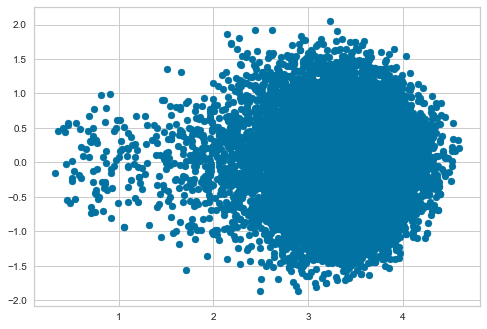

In [507]:
plt.scatter(pd.DataFrame(svd_seekers)[0], pd.DataFrame(svd_seekers)[1])

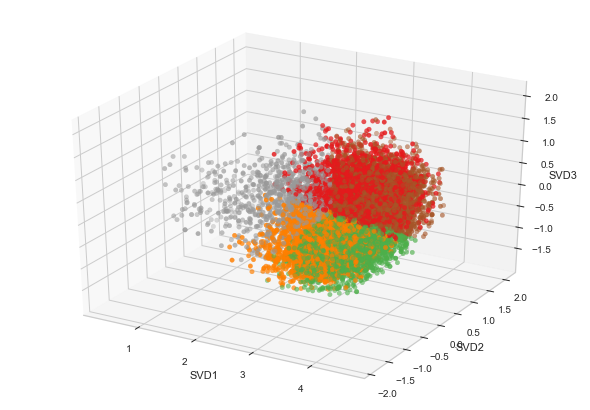

In [676]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = pd.DataFrame(svd_seekers)[0]
sequence_containing_y_vals = pd.DataFrame(svd_seekers)[1]
sequence_containing_z_vals = pd.DataFrame(svd_seekers)[2]


ax.scatter(sequence_containing_x_vals, 
           sequence_containing_y_vals, 
           sequence_containing_z_vals,
           #c=seekers_factors_personas_pca['persona_index'],
           c=SVD_kmeans.labels_,
           cmap = 'Set1')
ax.set_xlabel('SVD1')
ax.set_ylabel('SVD2')
ax.set_zlabel('SVD3')
pyplot.show()

### MCA Factor Analysis

Googling Seems to Suggest this a good decompostion technique for boolean data

Clustering Approach:
- Do MCA
- Then do k-means clustering

In [492]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=8, random_state=0)
X_transformed = transformer.fit_transform(seekers_array)
X_transformed

array([[-0.07912234,  0.50228488, -0.67755991, ...,  0.7032599 ,
        -0.03945455, -0.7982895 ],
       [-0.0874862 , -1.09789027, -0.86207546, ..., -0.10693148,
        -0.01413967, -0.5658484 ],
       [ 0.46610421, -0.75528929,  0.58779553, ...,  0.30861796,
        -0.14189305,  0.07744459],
       ...,
       [ 0.0368997 , -0.0969621 ,  1.16521548, ...,  0.36508787,
        -0.02617189,  0.4807623 ],
       [ 0.51605537, -0.5666706 , -0.4458645 , ..., -0.08713366,
        -1.36427499, -0.15613811],
       [-0.22015493, -0.7122144 , -0.55532068, ...,  0.25055617,
        -0.17705931,  1.10523739]])

In [501]:
## k-means clustering

from sklearn.cluster import KMeans
MCA_kmeans = KMeans(
    n_clusters=5, 
    random_state=0).fit(X_transformed)

MCA_kmeans.labels_


array([1, 2, 4, ..., 4, 4, 2], dtype=int32)

In [502]:
df_X_transformed = pd.DataFrame(data = X_transformed
             , columns = [
                 'Factor 1', 
                 'Factor 2',
                 'Factor 3',
                 'Factor 4',
                 'Factor 5',
                 'Factor 6',
                 'Factor 7',
                 'Factor 8'])

df_X_transformed['cluster'] = MCA_kmeans.labels_

df_X_transformed.head()

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,cluster
0,-0.079122,0.502285,-0.677560,-1.008443,0.423463,0.703260,-0.039455,-0.798290,1
1,-0.087486,-1.097890,-0.862075,0.158929,-0.135622,-0.106931,-0.014140,-0.565848,2
2,0.466104,-0.755289,0.587796,-0.851638,-0.829347,0.308618,-0.141893,0.077445,4
3,-1.000520,1.202648,0.383584,-1.049341,0.763779,-0.180952,-0.516372,-0.475568,1
4,0.965784,-1.082257,-0.318496,-1.452986,0.240356,0.720679,-0.377885,1.221193,4


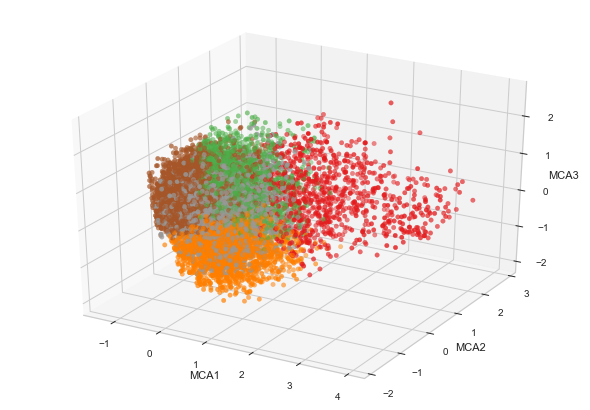

In [683]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = df_X_transformed['Factor 1']
sequence_containing_y_vals = df_X_transformed['Factor 2']
sequence_containing_z_vals = df_X_transformed['Factor 3']


ax.scatter(sequence_containing_x_vals, 
           sequence_containing_y_vals, 
           sequence_containing_z_vals,
           #c=seekers_factors_personas_pca['persona_index'],
           c=df_X_transformed['cluster'],
           cmap = 'Set1')
ax.set_xlabel('MCA1')
ax.set_ylabel('MCA2')
ax.set_zlabel('MCA3')
pyplot.show()

In [680]:
outputdata = seekers_data
outputdata['cluster'] = df_X_transformed['cluster']
outputdata.to_csv('outputdata.csv')

## PCA Before k-means Clustering

In [510]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 8)

principal_components = pca.fit_transform(seekers_array)

PCA_seekers = pd.DataFrame(data = principal_components
             , columns = [
                 'Principal Component 1', 
                 'Principal Component 2',
                 'Principal Component 3',
                 'Principal Component 4',
                 'Principal Component 5',
                 'Principal Component 6',
                 'Principal Component 7',
                 'Principal Component 8'])


from sklearn.cluster import KMeans
MCA_kmeans = KMeans(
    n_clusters=5, 
    random_state=0).fit(principal_components)

PCA_seekers['cluster'] = kmeans.labels_


PCA_seekers.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,cluster
0,-0.219882,-0.746158,0.366110,-0.644183,0.603590,-0.139155,-0.091766,0.987123,4
1,0.308183,0.157215,-0.970707,0.160420,0.642823,0.443614,0.148181,0.144247,5
2,0.397746,0.552422,0.214661,-0.133402,0.479416,0.024024,-0.834565,0.331640,7
3,-1.023050,-0.542691,0.943799,-0.316587,-0.210880,-0.749212,0.649812,0.029983,3
4,1.235241,0.308989,-0.254815,-1.145349,-0.064794,-0.802202,-0.632147,-0.537637,5


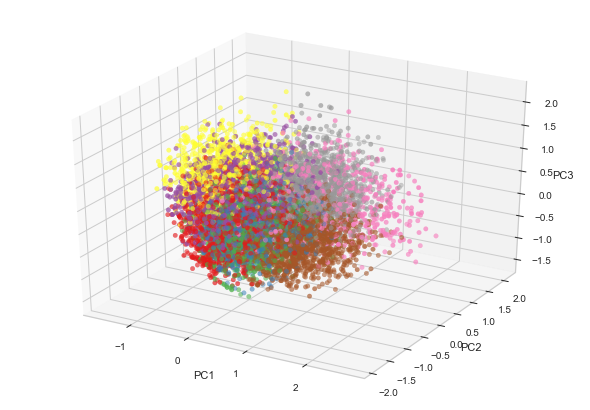

In [511]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = PCA_seekers['Principal Component 1']
sequence_containing_y_vals = PCA_seekers['Principal Component 2']
sequence_containing_z_vals = PCA_seekers['Principal Component 3']


ax.scatter(sequence_containing_x_vals, 
           sequence_containing_y_vals, 
           sequence_containing_z_vals,
           c=PCA_seekers['cluster'],
           cmap = 'Set1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
pyplot.show()

In [557]:
#Datasets
seekers_array
seekers_H
seekers_W
predictions;